# Final Project
## Gonzalo Martinez Medina

Oak-Ridge-National-Laboratory-ORNL-Rotating-Shadowband-Radiometer-RSR-Analysis
1. Identify changes of measured factors across time. What has changed? When? How do season affect the factors, and which factor show no impact.
2. Assess impact of radiation as a link to climate research and climate change.
3. Determine possible solar power output as an alternative based on the data collected.
4. Determine correlation between variables. Analyze high/low correlations and impact.
5. Eliminate possible outliers from dataset.

In [49]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import metpy.plots as mpplots
from metpy.units import units
from metpy.plots import SkewT
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from metpy.plots import Hodograph
#from datetime import datetime, timedelta


# Load data files
FIles need to be in your drive. You can download the data set to your computer here: <a> https://drive.google.com/drive/folders/1pQK7fA5RbQu3xF0XiIua30coFAGFY3mX?usp=sharing </a>
### Read them as csv format

In [50]:
# Load the data files t0 panda

file_2008 = pd.read_csv("2008_csv.csv")
file_2009 = pd.read_csv("2009_csv.csv")
file_2010 = pd.read_csv("2010_csv.csv")
file_2011 = pd.read_csv("2011_csv.csv")
file_2012 = pd.read_csv("2012_csv.csv")
file_2013 = pd.read_csv("2013_csv.csv")
file_2014 = pd.read_csv("2014_csv.csv")
file_2015 = pd.read_csv("2015_csv.csv")
file_2016 = pd.read_csv("2016_csv.csv")
file_2017 = pd.read_csv("2017_csv.csv")
file_2018 = pd.read_csv("2018_csv.csv")



In [51]:
# Join data bases
final_file=pd.concat([file_2008,file_2009,file_2010,file_2011,file_2012,file_2013,file_2014,file_2015,file_2016,file_2017,file_2018])
final_file.shape


(96421, 13)

### Yearly data for all 13 type of variables now is ready to be analyzed.

### Now we take a look at the data types:

In [52]:
final_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96421 entries, 0 to 8758
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DATE (MM/DD/YYYY)                    96421 non-null  object 
 1   HOUR-EST                             96421 non-null  int64  
 2   Avg Global Horizontal [W/m^2]        96421 non-null  float64
 3   Avg Direct Normal [W/m^2]            96421 non-null  float64
 4   Avg Diffuse Horizontal [W/m^2]       96421 non-null  float64
 5   Avg Direct (Bird estimated) [W/m^2]  96421 non-null  float64
 6   Avg Air Temperature [deg C]          96421 non-null  float64
 7   Avg Rel Humidity [%]                 96421 non-null  float64
 8   Avg Avg Wind Speed @ 42ft [m/s]      96421 non-null  float64
 9   Avg Est Pressure [mBar]              96421 non-null  float64
 10  Avg Precipitation [mm]               96421 non-null  float64
 11  Avg CR800 Temp [deg C]       

### What is being stored in each column:

A) Irradiance Variables
* Avg Global Horizontal [W/m^2]: is the total solar radiation received from above by a surface horizontal to the ground. This value is of particular importance for photovoltaic installations and includes Direct Normal Irradiance and Diffuse Horizontal Irradiance.
* Avg Direct Normal [W/m^2]: is the amount of solar radiation received per unit area by a surface that is always held perpendicular (or normal) to the rays that come in a straight line from the direction of the sun at its current position in the sky. Typically, you can maximize the amount of irradiance annually received by a surface by keeping it normal to incoming radiation. This quantity is of particular interest to concentrating solar thermal installations and installations that track the position of the sun.
* Avg Diffuse Horizontal [W/m^2]: Diffuse Horizontal Irradiance is the amount of radiation received per unit area by a surface (not subject to any shade or shadow) that does not arrive on a direct path from the sun, but has been scattered by molecules and particles in the atmosphere and comes equally from all directions.
* Avg Direct (Bird estimated) [W/m^2]: is an estimate measurement done by the Bird Clear Sky Model, authored by Richard Bird, which is a broadband algorithm that produces estimates of clear sky direct beam, hemispherical diffuse, and total hemispherical solar radiation on a horizontal surface.

B) Meteorological Variables (no detail needed)
* Avg Air Temperature [deg C]          
* Avg Rel Humidity [%]               
* Avg Avg Wind Speed @ 42ft [m/s]      
* Avg Est Pressure [mBar]              
* Avg Precipitation [mm]               

C) Other Variables
* Avg CR800 Temp [deg C]: is the temperature of the CR800 datalogger panel.
* Avg RSR Battery [VDC]: The RSR Battery powers the datalogger and the shadowband, it is charged by a photovoltaic panel, units in Volts of Direct Current.

### We need to change date format for further analysis later on:

In [53]:
final_d= final_file.rename(columns={"DATE (MM/DD/YYYY)": "datetime"}) #rename to exactlly datatime
final_d['datetime']=pd.to_datetime(final_d['datetime'].str.strip(), format='%m/%d/%Y')

### We will look at the first 10 data rows as an example of our data:

In [54]:
print('The data set looks like:')
#final_file.head(10)
final_d.head(10)

The data set looks like:


,datetime,HOUR-EST,Avg Global Horizontal [W/m^2],Avg Direct Normal [W/m^2],Avg Diffuse Horizontal [W/m^2],Avg Direct (Bird estimated) [W/m^2],Avg Air Temperature [deg C],Avg Rel Humidity [%],Avg Avg Wind Speed @ 42ft [m/s],Avg Est Pressure [mBar],Avg Precipitation [mm],Avg CR800 Temp [deg C],Avg RSR Battery [VDC]
0,2008-01-01,1,0.3342,0.0000,0.3342,0.0000,5.1477,81.7912,0.9980,1037.4333,0.0,2.6802,12.8600
1,2008-01-01,2,0.0745,0.0000,0.0745,0.0000,9.4980,67.5277,2.4877,1021.2500,0.0,6.5099,12.8528
2,2008-01-01,3,0.0011,0.0000,0.0011,0.0000,9.0335,57.2088,3.3520,1023.0833,0.0,8.1107,12.8500
3,2008-01-01,4,0.0248,0.0000,0.0248,0.0000,7.0070,39.1225,2.7082,1030.4000,0.0,7.0610,12.8425
4,2008-01-01,5,0.1632,0.0000,0.1632,0.0000,5.1809,45.6943,2.3489,1037.0333,0.0,5.1631,12.8232
5,2008-01-01,6,0.2902,0.0000,0.2902,0.0000,4.1170,52.0505,2.2516,1041.1833,0.0,3.7843,12.8042
6,2008-01-01,7,0.4957,0.0000,0.4957,0.0000,3.1835,56.4483,2.2983,1044.6500,0.0,2.8144,12.7852
7,2008-01-01,8,1.8618,0.0000,1.8618,63.9983,2.2580,59.7230,1.5852,1048.2167,0.0,1.8069,12.7637
8,2008-01-01,9,86.0246,380.6361,27.9096,469.2617,2.4748,60.8423,2.3751,1047.4167,0.0,1.2906,13.5438
9,2008-01-01,10,312.0933,717.9335,119.8969,738.8317,3.6684,55.6740,2.3860,1042.8500,0.0,2.4597,14.7152


### We can verify that the datatime column has the correct format to use the groupby time functions.
### We identify the 13 columns and will proceed to check for statistics information and overall correlation prior to visualization.

In [55]:
print('The main statistic of the data set are listed below:')
final_d.describe()

The main statistic of the data set are listed below:


,HOUR-EST,Avg Global Horizontal [W/m^2],Avg Direct Normal [W/m^2],Avg Diffuse Horizontal [W/m^2],Avg Direct (Bird estimated) [W/m^2],Avg Air Temperature [deg C],Avg Rel Humidity [%],Avg Avg Wind Speed @ 42ft [m/s],Avg Est Pressure [mBar],Avg Precipitation [mm],Avg CR800 Temp [deg C],Avg RSR Battery [VDC]
count,96421.000000,96421.000000,96421.000000,96421.000000,96421.000000,96421.000000,96421.000000,96421.000000,96421.000000,96421.000000,96421.000000,96421.000000
mean,11.501312,164.315223,151.424567,70.880460,400.394375,15.332713,76.251242,0.886992,1001.865185,0.002270,16.018539,13.216989
std,6.921527,247.610712,270.028944,107.631756,416.279323,10.041264,18.690284,0.785162,35.232427,0.015745,11.367144,0.653231
min,0.000000,-0.006500,-0.929500,-0.006500,0.000000,-19.504000,16.137000,0.200000,916.600000,0.000000,-20.140800,12.386200
25%,6.000000,0.000200,0.000000,0.000200,0.000000,7.603100,62.658300,0.233400,975.716700,0.000000,7.445500,12.718200
50%,12.000000,5.807600,0.000000,5.693600,180.325000,16.383800,81.333800,0.606500,997.000000,0.000000,16.504500,12.830800
75%,18.000000,274.041600,182.462300,108.132700,873.200000,22.703000,92.920000,1.330300,1028.200000,0.000000,23.442000,13.834000
max,23.000000,1045.275700,1002.269400,1000.843700,1004.466700,41.762300,99.480000,7.833300,1138.150000,0.715400,48.751000,15.251200


In [56]:
print('and the correlation table is:')
final_d.corr()

and the correlation table is:


,HOUR-EST,Avg Global Horizontal [W/m^2],Avg Direct Normal [W/m^2],Avg Diffuse Horizontal [W/m^2],Avg Direct (Bird estimated) [W/m^2],Avg Air Temperature [deg C],Avg Rel Humidity [%],Avg Avg Wind Speed @ 42ft [m/s],Avg Est Pressure [mBar],Avg Precipitation [mm],Avg CR800 Temp [deg C],Avg RSR Battery [VDC]
HOUR-EST,1.000000,0.153319,0.130795,0.148710,0.226102,0.209029,-0.361113,0.169273,-0.206218,0.002802,0.270119,0.238331
Avg Global Horizontal [W/m^2],0.153319,1.000000,0.850849,0.730782,0.790673,0.463493,-0.636939,0.465670,-0.451143,-0.076213,0.491308,0.795225
Avg Direct Normal [W/m^2],0.130795,0.850849,1.000000,0.347274,0.640104,0.314225,-0.634415,0.383495,-0.305040,-0.077899,0.340748,0.720083
Avg Diffuse Horizontal [W/m^2],0.148710,0.730782,0.347274,1.000000,0.760911,0.421732,-0.420093,0.403133,-0.411926,-0.055425,0.438009,0.710281
Avg Direct (Bird estimated) [W/m^2],0.226102,0.790673,0.640104,0.760911,1.000000,0.396787,-0.549101,0.497721,-0.389106,0.004904,0.421446,0.833477
Avg Air Temperature [deg C],0.209029,0.463493,0.314225,0.421732,0.396787,1.000000,-0.223705,0.092458,-0.999205,0.009711,0.987579,0.273316
Avg Rel Humidity [%],-0.361113,-0.636939,-0.634415,-0.420093,-0.549101,-0.223705,1.000000,-0.522384,0.212218,0.130945,-0.300761,-0.642805
Avg Avg Wind Speed @ 42ft [m/s],0.169273,0.465670,0.383495,0.403133,0.497721,0.092458,-0.522384,1.000000,-0.088590,0.043115,0.131342,0.497798
Avg Est Pressure [mBar],-0.206218,-0.451143,-0.305040,-0.411926,-0.389106,-0.999205,0.212218,-0.088590,1.000000,-0.012673,-0.984652,-0.267256
Avg Precipitation [mm],0.002802,-0.076213,-0.077899,-0.055425,0.004904,0.009711,0.130945,0.043115,-0.012673,1.000000,0.009674,-0.081274


### Information that we can extract from the above table:

### From strong to weak:

* As expected, there is a strong correlation between the variable Avg Global Horizontal, and the rest of the irradiance variables: Direct Normal, Diffuse Horizontal, and Bird estimated.
* There is a strong correlation between the Global Horizontal and the RSR Battery. It can be due to the fact that the battery is charged through a PV.
* There is a significant negative correlation between Global Horizontal and Relative Humidity. As one increases, the other decreases.
* There is a significant correlation between Global Horizontal and CR800 Temperature which is expected.
* There is a significant correlation between Global Horizontal and Air Temperature. also expected.
* There is an equally stong correlation between Global Horizontal and Wind Speed at 42 ft that was not expected.

Air temperature, Atm Preassure, and CR800 temperature show stron correlations as expected.

### Now lets plot important variables:
 Global Horizontal vs. RSR Battery
 Global Horizontal vs. Relative Humidity
 Global Horizontal vs. Wind Speed
 Hour vs. Avg. Direct

<AxesSubplot:xlabel='HOUR-EST', ylabel='Avg Direct Normal [W/m^2]'>

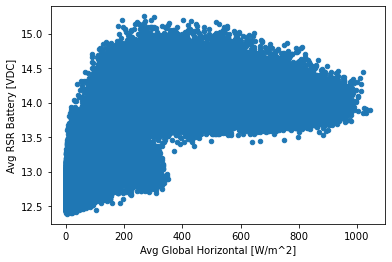

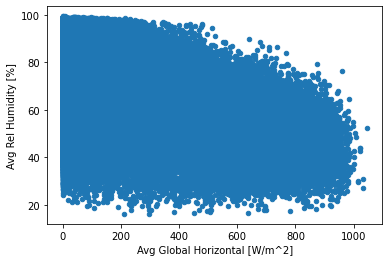

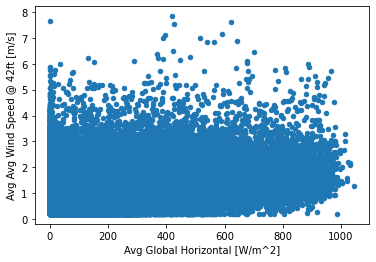

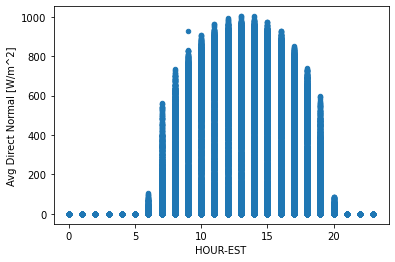

In [57]:
final_d.plot.scatter(x='Avg Global Horizontal [W/m^2]', y='Avg RSR Battery [VDC]')
final_d.plot.scatter(x='Avg Global Horizontal [W/m^2]', y='Avg Rel Humidity [%]')
final_d.plot.scatter(x='Avg Global Horizontal [W/m^2]', y='Avg Avg Wind Speed @ 42ft [m/s]')
final_d.plot.scatter(x='HOUR-EST', y='Avg Direct Normal [W/m^2]')


### Lets see if only one year can clean the view of the same plots:

<AxesSubplot:xlabel='HOUR-EST', ylabel='Avg Direct Normal [W/m^2]'>

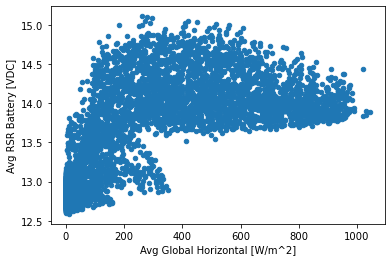

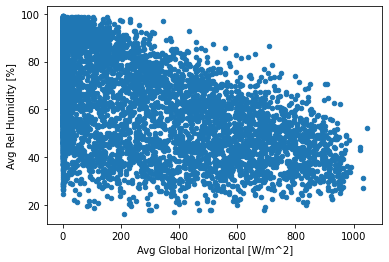

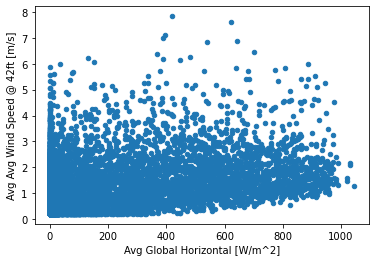

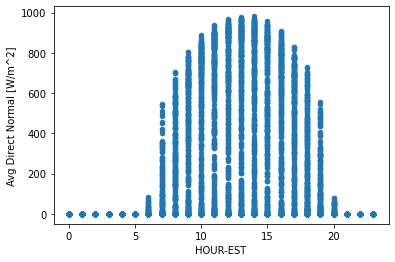

In [58]:
file_2008.plot.scatter(x='Avg Global Horizontal [W/m^2]', y='Avg RSR Battery [VDC]')
file_2008.plot.scatter(x='Avg Global Horizontal [W/m^2]', y='Avg Rel Humidity [%]')
file_2008.plot.scatter(x='Avg Global Horizontal [W/m^2]', y='Avg Avg Wind Speed @ 42ft [m/s]')
file_2008.plot.scatter(x='HOUR-EST', y='Avg Direct Normal [W/m^2]')


### Lets see how the pair plot of the important variables, detailed above, behaves for 2008:

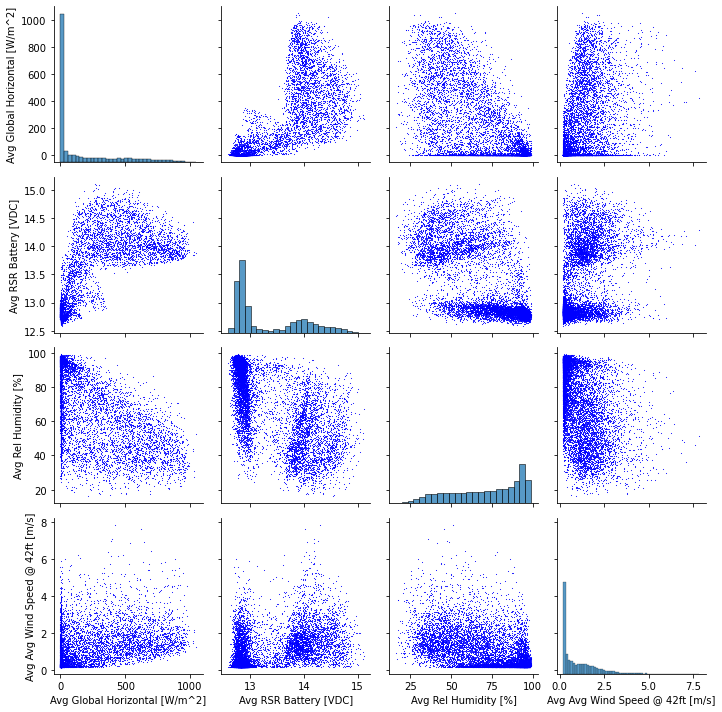

In [59]:
# Additional plots of main correlations from data, from only 2008
sns.pairplot(
    file_2008[['Avg Global Horizontal [W/m^2]', 'Avg RSR Battery [VDC]','Avg Rel Humidity [%]','Avg Avg Wind Speed @ 42ft [m/s]']],
    diag_kind='hist', palette='bright',plot_kws={'facecolor': 'b', 'edgecolor': 'b', 's': 1})

plt.tight_layout()

### What about for the whole dataset (same variables):

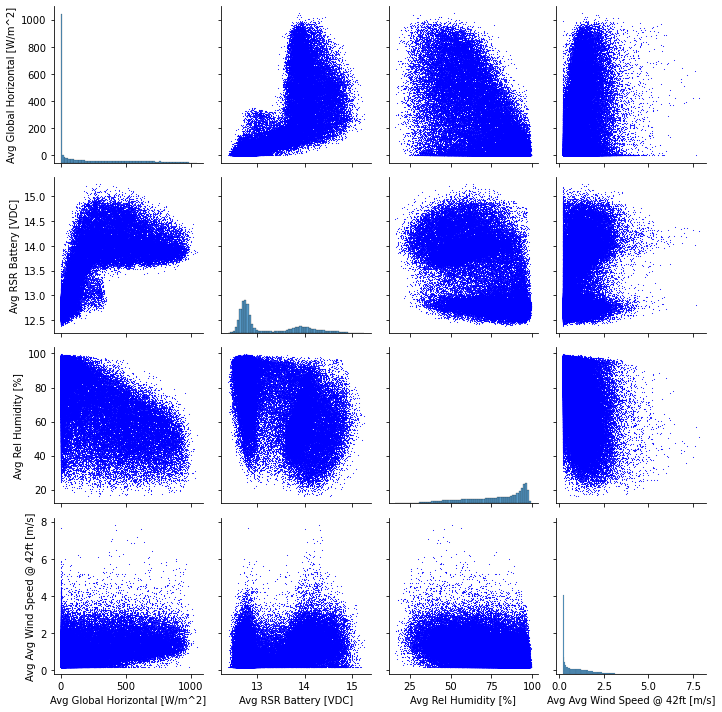

In [60]:
# Additional plots of main correlations from data
sns.pairplot(
    final_d[['Avg Global Horizontal [W/m^2]', 'Avg RSR Battery [VDC]','Avg Rel Humidity [%]','Avg Avg Wind Speed @ 42ft [m/s]']],
    diag_kind='hist', palette='bright',plot_kws={'facecolor': 'b', 'edgecolor': 'b', 's': 1})

plt.tight_layout()

### The above plots might yield better results if we obtain averages by year, month, and hour across the complete set.  
### This way, we can analyze behavior and trends by years:

In [61]:
# Group by year
year=final_d.groupby([final_d["datetime"].dt.year]).mean()
year

,HOUR-EST,Avg Global Horizontal [W/m^2],Avg Direct Normal [W/m^2],Avg Diffuse Horizontal [W/m^2],Avg Direct (Bird estimated) [W/m^2],Avg Air Temperature [deg C],Avg Rel Humidity [%],Avg Avg Wind Speed @ 42ft [m/s],Avg Est Pressure [mBar],Avg Precipitation [mm],Avg CR800 Temp [deg C],Avg RSR Battery [VDC]
datetime,,,,,,,,,,,,
2008,11.501309,177.684950,172.444468,73.324203,401.993502,14.700469,71.278436,1.082824,1004.037047,0.002066,15.240270,13.311776
2009,11.501313,164.696944,148.465488,74.748083,401.028190,14.611171,76.701501,1.068320,1004.277556,0.002843,15.116400,13.292992
2010,11.501313,174.558550,168.114262,69.974128,401.085352,14.685896,75.334645,0.958030,1004.412197,0.000000,15.347536,13.279585
2011,11.501313,167.601188,152.102307,72.851910,400.531152,15.484391,76.021088,0.866320,1001.317285,0.002923,16.236696,13.251684
2012,11.501309,169.937607,161.896394,68.765198,399.838494,16.068130,76.130171,0.779254,999.150199,0.002213,16.829062,13.236831
2013,11.501313,156.636322,116.383798,86.745135,400.458756,14.632301,77.813362,0.799423,1004.210300,0.003012,15.296082,13.224624
2014,11.501313,165.865092,150.496711,72.376084,400.690559,14.527002,76.001753,0.780326,1004.752238,0.002159,15.221167,13.237114
2015,11.501313,159.557400,146.663369,68.064706,399.752662,15.759067,78.359464,0.830721,1000.380738,0.002450,16.498335,13.188752
2016,11.501309,170.588675,172.472218,64.695280,399.853511,16.309762,74.308743,0.843413,998.564206,0.001961,16.996400,13.165789


### By month:

In [62]:
# Group by month
month=final_d.groupby([final_d["datetime"].dt.month]).mean()
month

,HOUR-EST,Avg Global Horizontal [W/m^2],Avg Direct Normal [W/m^2],Avg Diffuse Horizontal [W/m^2],Avg Direct (Bird estimated) [W/m^2],Avg Air Temperature [deg C],Avg Rel Humidity [%],Avg Avg Wind Speed @ 42ft [m/s],Avg Est Pressure [mBar],Avg Precipitation [mm],Avg CR800 Temp [deg C],Avg RSR Battery [VDC]
datetime,,,,,,,,,,,,
1,11.515478,85.452675,111.909842,37.161503,317.744674,3.063089,74.871533,0.994832,1045.784818,0.002195,2.947169,13.189767
2,11.500000,108.026472,111.721196,50.396583,359.978244,5.919797,72.610133,1.110041,1035.060439,0.002293,5.965377,13.221580
3,11.500000,149.196287,137.897852,66.269629,407.163823,10.648734,69.973048,1.152764,1017.793206,0.002179,10.962655,13.272325
4,11.500000,208.173608,186.994689,82.306754,447.592912,16.026411,68.704503,1.144548,998.783375,0.002733,16.774163,13.292701
5,11.500000,231.411089,173.882548,106.786078,473.136392,20.529376,75.801297,0.919675,983.347687,0.001912,21.869055,13.271565
6,11.500000,250.668783,187.917293,113.526699,482.675425,24.658090,76.819440,0.795383,969.594663,0.002187,26.257709,13.238881
7,11.500000,233.611097,177.292820,104.735384,472.298832,25.683839,79.057255,0.739639,966.227014,0.002651,27.283416,13.219219
8,11.500000,215.058090,175.449978,93.779443,445.055251,24.989092,79.485783,0.688996,968.477110,0.002024,26.455625,13.213562
9,11.500000,178.251784,167.031451,73.160475,407.887068,21.917080,80.861185,0.683291,978.623281,0.002264,22.969137,13.206031


### By hour:

In [63]:
# Avg by hour
hour=final_d.groupby('HOUR-EST').mean()
hour

,Avg Global Horizontal [W/m^2],Avg Direct Normal [W/m^2],Avg Diffuse Horizontal [W/m^2],Avg Direct (Bird estimated) [W/m^2],Avg Air Temperature [deg C],Avg Rel Humidity [%],Avg Avg Wind Speed @ 42ft [m/s],Avg Est Pressure [mBar],Avg Precipitation [mm],Avg CR800 Temp [deg C],Avg RSR Battery [VDC]
HOUR-EST,,,,,,,,,,,
0,0.190340,0.000000,0.190340,0.000000,12.539532,86.320969,0.511778,1011.337069,0.002503,12.387943,12.749140
1,0.194626,0.000000,0.194626,0.000000,12.093266,87.401346,0.511281,1012.923453,0.001994,11.772521,12.735968
2,0.197325,0.000000,0.197325,0.000000,11.741160,88.337191,0.511700,1014.180865,0.002067,11.301977,12.723276
3,0.200011,0.000000,0.200011,0.000000,11.429147,89.104021,0.512419,1015.302576,0.001932,10.916575,12.711782
4,0.201298,0.000000,0.201298,0.000000,11.169124,89.681583,0.514763,1016.237394,0.002092,10.595863,12.700248
5,0.202628,0.000000,0.202628,0.000000,10.948387,90.177441,0.513883,1017.036425,0.002262,10.332470,12.689470
6,2.012950,1.887086,1.855681,40.072619,10.781962,90.532719,0.527698,1017.646831,0.002298,10.121388,12.674569
7,27.958209,41.439850,20.119667,230.717961,11.080720,89.759375,0.548841,1016.666438,0.002398,10.122854,12.669227
8,98.698471,127.784994,58.414019,497.387658,12.269974,86.532888,0.646163,1012.610428,0.002124,10.903871,12.835096


### Lets look at the behaviour of our 4 variables:
### 1. Grouped by year

<AxesSubplot:xlabel='Year', ylabel='m/s'>

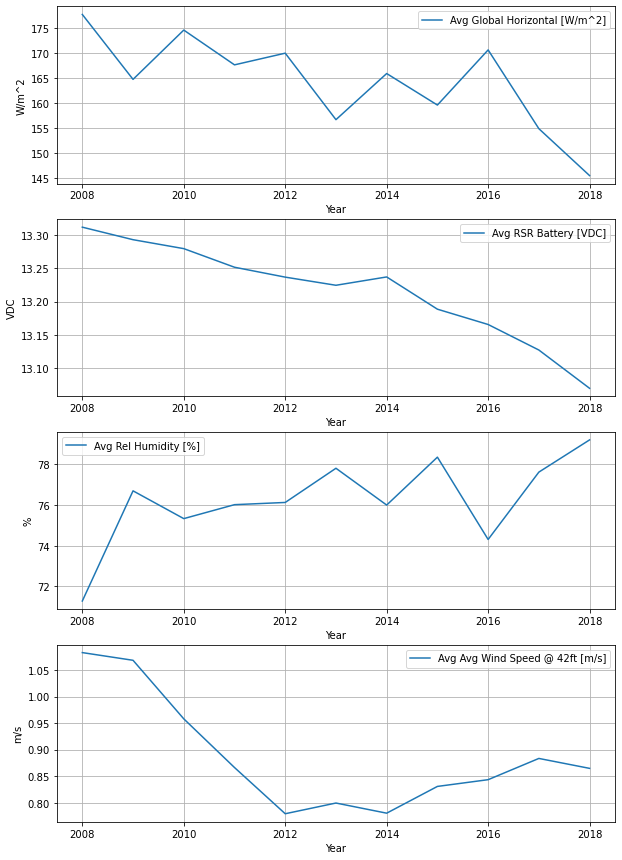

In [64]:
figure, axes = plt.subplots(nrows = 4,ncols=1)

year.plot(y=['Avg Global Horizontal [W/m^2]'],xlabel = 'Year', ylabel='W/m^2', grid = True,
                     figsize = (10,15),ax = axes[0])
year.plot(y=['Avg RSR Battery [VDC]'],xlabel = 'Year', ylabel='VDC', grid = True,
                     figsize = (10,15),ax = axes[1])
year.plot(y=['Avg Rel Humidity [%]'],xlabel = 'Year',  ylabel='%',grid = True,
                     figsize = (10,15),ax = axes[2])
year.plot(y=['Avg Avg Wind Speed @ 42ft [m/s]'],xlabel = 'Year',  ylabel= 'm/s',grid = True,
                     figsize = (10,15),ax = axes[3])

### 2. Grouped by month

<AxesSubplot:xlabel='Month', ylabel='m/s'>

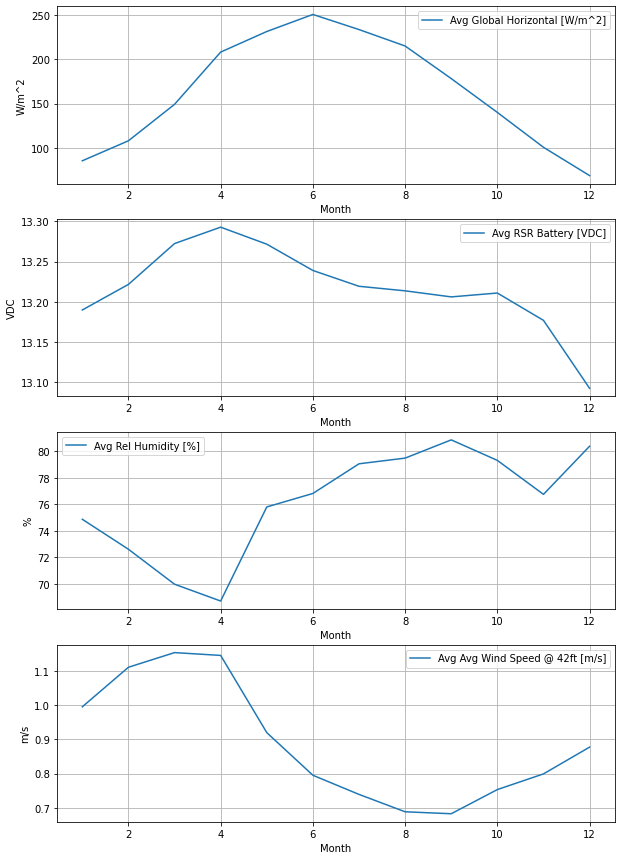

In [65]:
figure, axes = plt.subplots(nrows = 4,ncols=1)

month.plot(y=['Avg Global Horizontal [W/m^2]'],xlabel = 'Month', ylabel='W/m^2', grid = True,
                     figsize = (10,15),ax = axes[0])
month.plot(y=['Avg RSR Battery [VDC]'],xlabel = 'Month', ylabel='VDC', grid = True,
                     figsize = (10,15),ax = axes[1])
month.plot(y=['Avg Rel Humidity [%]'],xlabel = 'Month',  ylabel='%',grid = True,
                     figsize = (10,15),ax = axes[2])
month.plot(y=['Avg Avg Wind Speed @ 42ft [m/s]'],xlabel = 'Month',  ylabel= 'm/s',grid = True,
                     figsize = (10,15),ax = axes[3])

### 3. Grouped by hour

<AxesSubplot:xlabel='Hour', ylabel='m/s'>

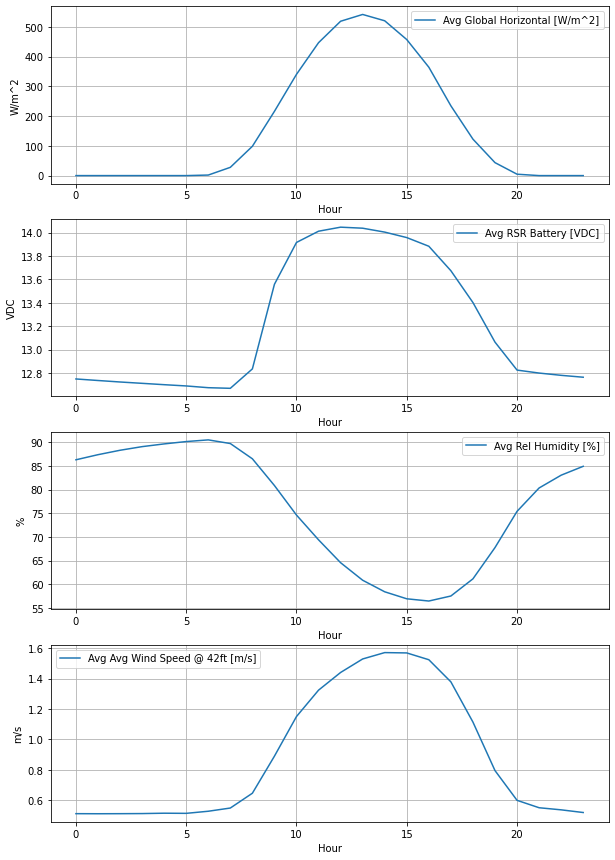

In [66]:
figure, axes = plt.subplots(nrows = 4,ncols=1)

hour.plot(y=['Avg Global Horizontal [W/m^2]'],xlabel = 'Hour', ylabel='W/m^2', grid = True,
                     figsize = (10,15),ax = axes[0])
hour.plot(y=['Avg RSR Battery [VDC]'],xlabel = 'Hour', ylabel='VDC', grid = True,
                     figsize = (10,15),ax = axes[1])
hour.plot(y=['Avg Rel Humidity [%]'],xlabel = 'Hour',  ylabel='%',grid = True,
                     figsize = (10,15),ax = axes[2])
hour.plot(y=['Avg Avg Wind Speed @ 42ft [m/s]'],xlabel = 'Hour',  ylabel= 'm/s',grid = True,
                     figsize = (10,15),ax = axes[3])

### Lets now view the same plots but by hour grouped and paired:

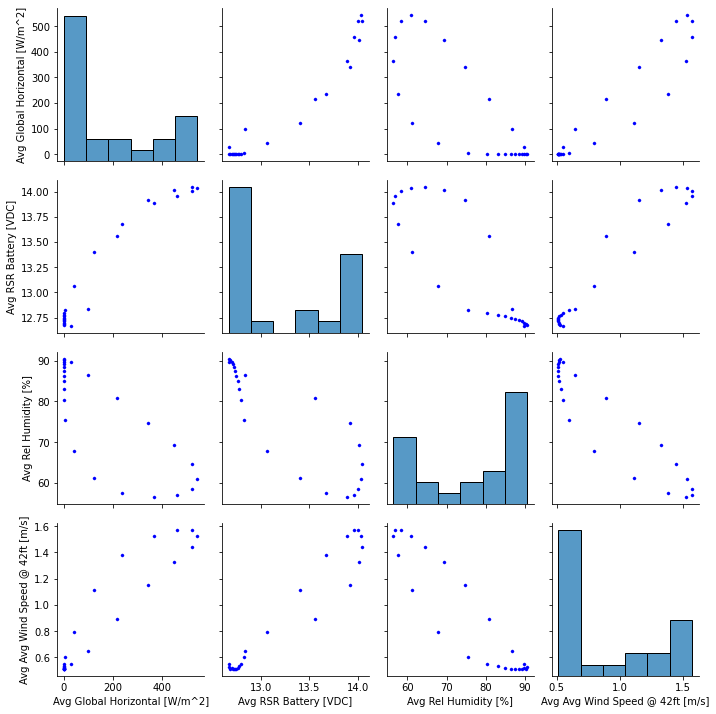

In [67]:

sns.pairplot(
    hour[['Avg Global Horizontal [W/m^2]', 'Avg RSR Battery [VDC]','Avg Rel Humidity [%]','Avg Avg Wind Speed @ 42ft [m/s]']],
    diag_kind='hist', palette='bright',plot_kws={'facecolor': 'b', 'edgecolor': 'b', 's': 10})

plt.tight_layout()

### Before further analysis, now that we have the yearly data grouped, we will check that the irradiance variables behave accordingly:

<AxesSubplot:xlabel='Year', ylabel='W/m^2'>

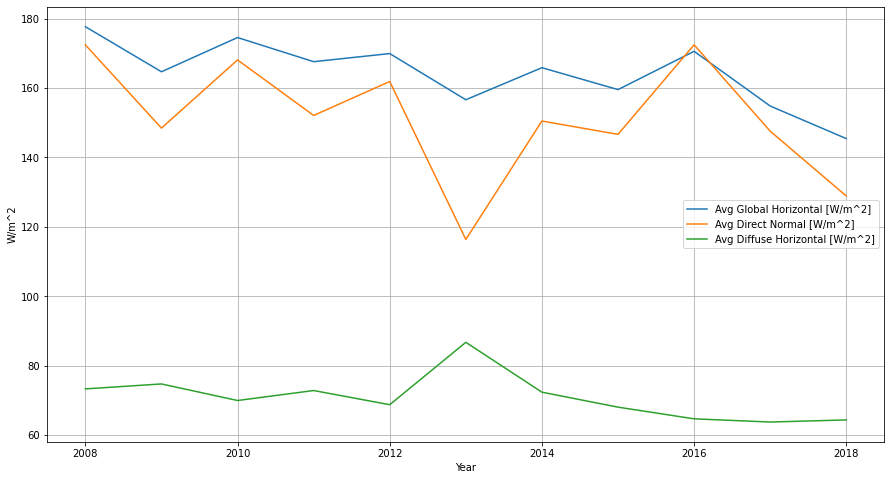

In [68]:
year.plot(y=['Avg Global Horizontal [W/m^2]','Avg Direct Normal [W/m^2]','Avg Diffuse Horizontal [W/m^2]'],
          xlabel = 'Year', ylabel='W/m^2', grid = True,figsize = (15,8))


### Lets compare behavior between our main variables

In [69]:
#['Avg Global Horizontal [W/m^2]', 'Avg RSR Battery [VDC]','Avg Rel Humidity [%]','Avg Avg Wind Speed @ 42ft [m/s]']

* Year

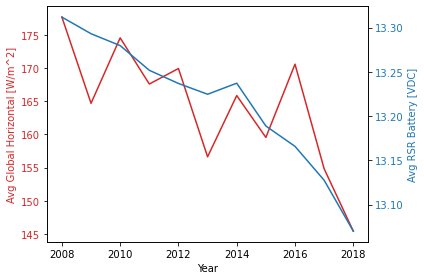

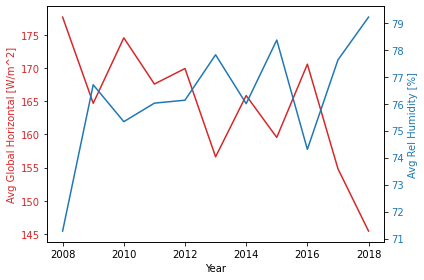

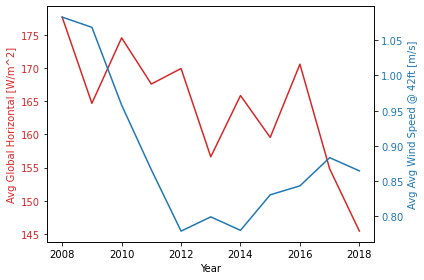

In [70]:
# Year comparison between Global Horiz and Avg. RSR
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Global Horizontal [W/m^2]', color=color)
ax1.plot(year['Avg Global Horizontal [W/m^2]'],color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Avg RSR Battery [VDC]', color=color)  
ax2.plot(year['Avg RSR Battery [VDC]'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

# Year comparison between Global Horiz and Avg. Humidity
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Global Horizontal [W/m^2]', color=color)
ax1.plot(year['Avg Global Horizontal [W/m^2]'],color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Avg Rel Humidity [%]', color=color)  
ax2.plot(year['Avg Rel Humidity [%]'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

# Year comparison between Global Horiz and Avg. Humidity
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Global Horizontal [W/m^2]', color=color)
ax1.plot(year['Avg Global Horizontal [W/m^2]'],color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Avg Avg Wind Speed @ 42ft [m/s]', color=color)  
ax2.plot(year['Avg Avg Wind Speed @ 42ft [m/s]'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()


* Month

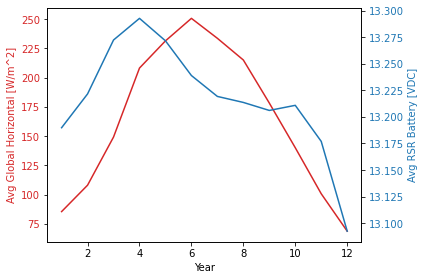

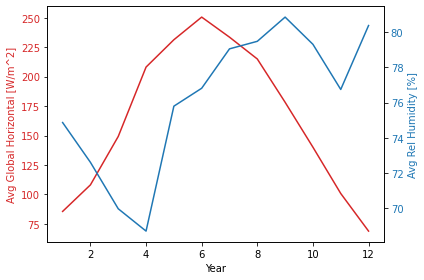

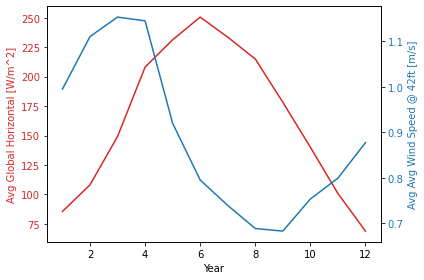

In [71]:
# Month comparison between Global Horiz and Avg. RSR
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Global Horizontal [W/m^2]', color=color)
ax1.plot(month['Avg Global Horizontal [W/m^2]'],color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Avg RSR Battery [VDC]', color=color)  
ax2.plot(month['Avg RSR Battery [VDC]'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

# Month comparison between Global Horiz and Avg. Humidity
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Global Horizontal [W/m^2]', color=color)
ax1.plot(month['Avg Global Horizontal [W/m^2]'],color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Avg Rel Humidity [%]', color=color)  
ax2.plot(month['Avg Rel Humidity [%]'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

# Month comparison between Global Horiz and Avg. Humidity
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Global Horizontal [W/m^2]', color=color)
ax1.plot(month['Avg Global Horizontal [W/m^2]'],color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Avg Avg Wind Speed @ 42ft [m/s]', color=color)  
ax2.plot(month['Avg Avg Wind Speed @ 42ft [m/s]'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()


* Hour

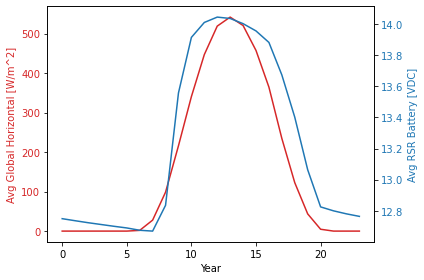

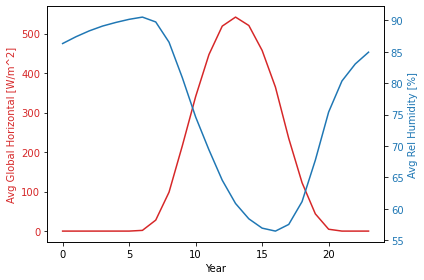

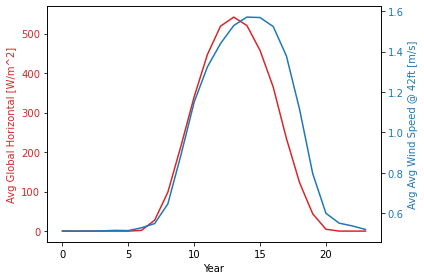

In [72]:
# Hour comparison between Global Horiz and Avg. RSR
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Global Horizontal [W/m^2]', color=color)
ax1.plot(hour['Avg Global Horizontal [W/m^2]'],color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Avg RSR Battery [VDC]', color=color)  
ax2.plot(hour['Avg RSR Battery [VDC]'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

# Hour comparison between Global Horiz and Avg. Humidity
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Global Horizontal [W/m^2]', color=color)
ax1.plot(hour['Avg Global Horizontal [W/m^2]'],color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Avg Rel Humidity [%]', color=color)  
ax2.plot(hour['Avg Rel Humidity [%]'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

# Hour comparison between Global Horiz and Avg. Humidity
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Global Horizontal [W/m^2]', color=color)
ax1.plot(hour['Avg Global Horizontal [W/m^2]'],color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Avg Avg Wind Speed @ 42ft [m/s]', color=color)  
ax2.plot(hour['Avg Avg Wind Speed @ 42ft [m/s]'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()


### Now we will use code from the lectures to plot the upper air sounding
### We need to add a dew point column that uses temperature, and relative humidity

In [73]:
# USE METPLOT CALC
# Similar to class example:
# Td = T - ((100 - RH)/5.)
# Add dew point column
final_d['Dew point']=final_d['Avg Air Temperature [deg C]']-((100-final_d['Avg Rel Humidity [%]'])/5)
fin_2=final_d[['Avg Air Temperature [deg C]','Avg Avg Wind Speed @ 42ft [m/s]','Avg Est Pressure [mBar]','Dew point']]
# arrange by increasing temperature
fin_s=fin_2.sort_values(by=['Avg Air Temperature [deg C]'])


### We calculate the LCL Pressure and LCL Temperature

In [74]:
# assign units
p = fin_s.sort_values(by=['Avg Est Pressure [mBar]'])['Avg Est Pressure [mBar]'].values * units.hPa # mBar=hPa
t = fin_s['Avg Air Temperature [deg C]'].values * units.degC
td = fin_s['Dew point'].values * units.degC
irrad=final_d['Avg Global Horizontal [W/m^2]']
u = np.linspace(-10, 10, len(p)) * units.knots
v = np.linspace(-20, 20, len(p)) * units.knots
#u = np.linspace(-10, 10, len(p)) * units.meter/units.second
#v = np.linspace(-20, 20, len(p)) * units.meter/units.second


# Calculate the LCL
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], t[0], td[0])
print('Lcl Pressure',lcl_pressure,' and Lcl temperature', lcl_temperature)

# Calculate the parcel profile.
parcel_prof = mpcalc.parcel_profile(p, t[0], td[0]).to('degC')

# Bulk shear
bulk_u, bulk_v=mpcalc.bulk_shear(p,u,v)
print(bulk_u, bulk_v)


Lcl Pressure 867.4389548199753 hectopascal  and Lcl temperature -23.467702593752257 degree_Celsius
-3.620203277328354 knot -7.240406554656708 knot


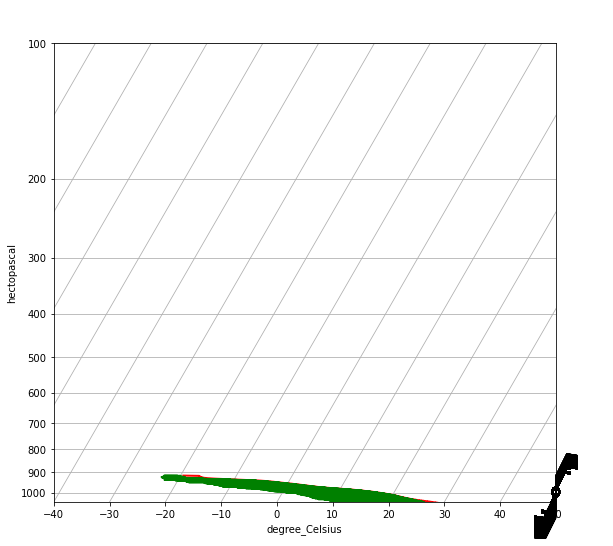

In [75]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, t, 'r', linewidth=2)
skew.plot(p, td, 'g', linewidth=2)
skew.plot_barbs(p, u, v)

# Show the plot
plt.show()

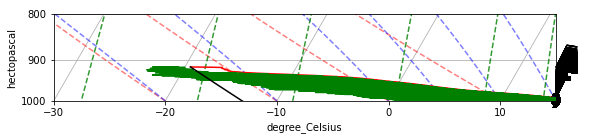

In [76]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)


skew.plot(p, t, 'r')
skew.plot(p, td, 'g')
skew.plot(p, parcel_prof, 'k')  # Plot parcel profile
skew.plot_barbs(p[::5], u[::5], v[::5])

skew.ax.set_xlim(-30, 15)
skew.ax.set_ylim(1000, 800)

#skew.ax.set_ylim(1000, 100)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

plt.show()


### And come up with the final plot

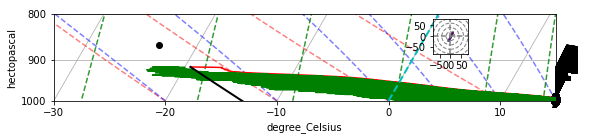

In [77]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=30)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, t, 'r')
skew.plot(p, td, 'g')
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 800)
skew.ax.set_xlim(-30, 15)

# Plot LCL as black dot
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Plot the parcel profile as a black line
skew.plot(p, parcel_prof, 'k', linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(p, t, parcel_prof, td)
skew.shade_cape(p, t, parcel_prof)

# Plot a zero degree isotherm
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Create a hodograph
# Create an inset axes object that is 40% width and height of the
# figure and put it in the upper right hand corner.
ax_hod = inset_axes(skew.ax, '40%', '40%', loc=1)
h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=20)
h.plot_colormapped(u, v, irrad)  

# Show the plot
plt.show()

### We conclude by testing an additional code found here:
<a> https://unidata.github.io/MetPy/latest/tutorials/upperair_soundings.html </a>
### For only our hour dataframe

In [38]:
# USING HOUR FILE
hour['Dew point']=hour['Avg Air Temperature [deg C]']-((100-hour['Avg Rel Humidity [%]'])/5)
fin_h=hour[['Avg Air Temperature [deg C]','Avg Avg Wind Speed @ 42ft [m/s]','Avg Est Pressure [mBar]','Dew point']]
# arrange by increasing temperature
fin_s_h=fin_h.sort_values(by=['Avg Air Temperature [deg C]'])


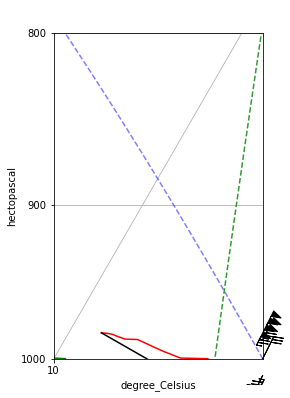

In [83]:
# USING HOUR FILE
fig = plt.figure(figsize=(6, 6))
skew = SkewT(fig)

ph = fin_s_h.sort_values(by=['Avg Est Pressure [mBar]'])['Avg Est Pressure [mBar]'].values * units.hPa # mBar=hPa
th = fin_s_h['Avg Air Temperature [deg C]'].values * units.degC
tdh = fin_s_h['Dew point'].values * units.degC
uh = np.linspace(-100, 100, len(ph)) * units.knots
vh = np.linspace(-200, 200, len(ph)) * units.knots

# Calculate parcel profile
profh = mpcalc.parcel_profile(ph, th[0], tdh[0]).to('degC')


skew.plot(ph, th, 'r')
skew.plot(ph, tdh, 'g')
skew.plot(ph, profh, 'k')  # Plot parcel profile
skew.plot_barbs(ph[::5], uh[::5], vh[::5])

skew.ax.set_xlim(10, 15)
skew.ax.set_ylim(1000, 800)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

plt.show()
